In [289]:
import json
import matplotlib.pyplot as plt 
from statistics import mean
import csv

In [290]:
with open('algorithm_data.json') as f:
    data = json.load(f)
    
with open('randomforest_results.json')as g:
    rf_data = json.load(g)

In [291]:
import pandas
df = pandas.read_csv('processed_data.csv')

In [292]:
filename = []
nn_accuracy = []
nb_accuracy = []
svm_accuracy = []
rf_accuracy = []

nn_matrix = []
svm_matrix = []
rf_matrix = []

for i in data:
    Dict = data[i]
    rf = rf_data[i]
    filename.append(Dict["filename"])
    nn_accuracy.append(Dict["Neural_Network"]["mean_accuracy"])
    nb_accuracy.append(Dict["Naive_Bayes"]["mean_accuracy"])
    svm_accuracy.append(Dict["svm"]["mean_accuracy"])
    rf_accuracy.append(rf["Random_forest"]["mean_accuracy"])
    
    nn_matrix.append(Dict["Neural_Network"]["confusion_matrix"])
    svm_matrix.append(Dict["svm"]["confusion_matrix"])
    rf_matrix.append(rf["Random_forest"]["confusion_matrix"])
    
    
    

        

In [307]:
type(nn_accuracy[1])

float

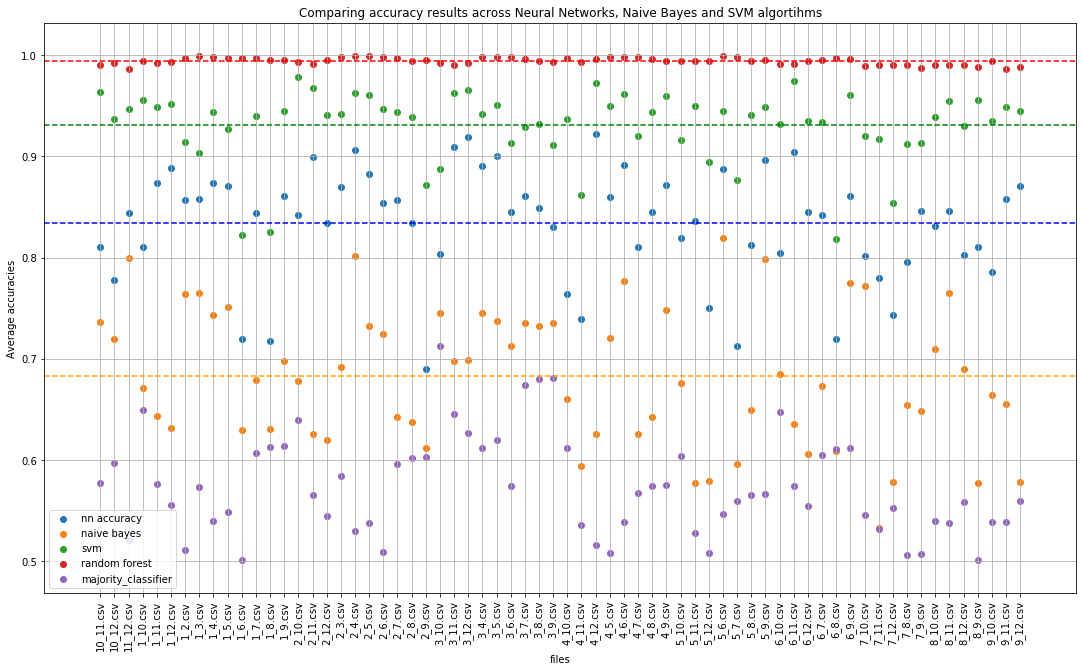

In [342]:
filename, nn_accuracy, nb_accuracy, svm_accuracy, rf_accuracy = zip(*sorted(zip(filename, nn_accuracy, nb_accuracy, svm_accuracy, rf_accuracy)))


plt.scatter(filename, nn_accuracy, label = "nn accuracy")
plt.scatter(filename, nb_accuracy, label = "naive bayes")
plt.scatter(filename, svm_accuracy, label = "svm")
plt.scatter(filename, rf_accuracy , label = "random forest")
plt.scatter(filename, majority_classifier, label = "majority_classifier")


plt.xlabel("files")
plt.xticks(rotation='vertical')
plt.ylabel("Average accuracies")
plt.title("Comparing accuracy results across Neural Networks, Naive Bayes and SVM algortihms")

plt.axhline(overallavg_nn,linestyle = 'dashed', color = 'blue')
plt.axhline(overallavg_nb,linestyle = 'dashed', color = 'orange')
plt.axhline(overallavg_svm,linestyle = 'dashed', color = 'green')
plt.axhline(overallavg_rf,linestyle = 'dashed', color = 'red')

plt.grid()
plt.legend()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
plt.savefig('comparison_average_accuracies_scatter.png')


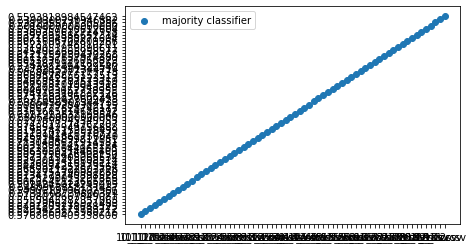

In [302]:
plt.scatter(filename, majority_classifier, label = "majority classifier")
plt.legend()


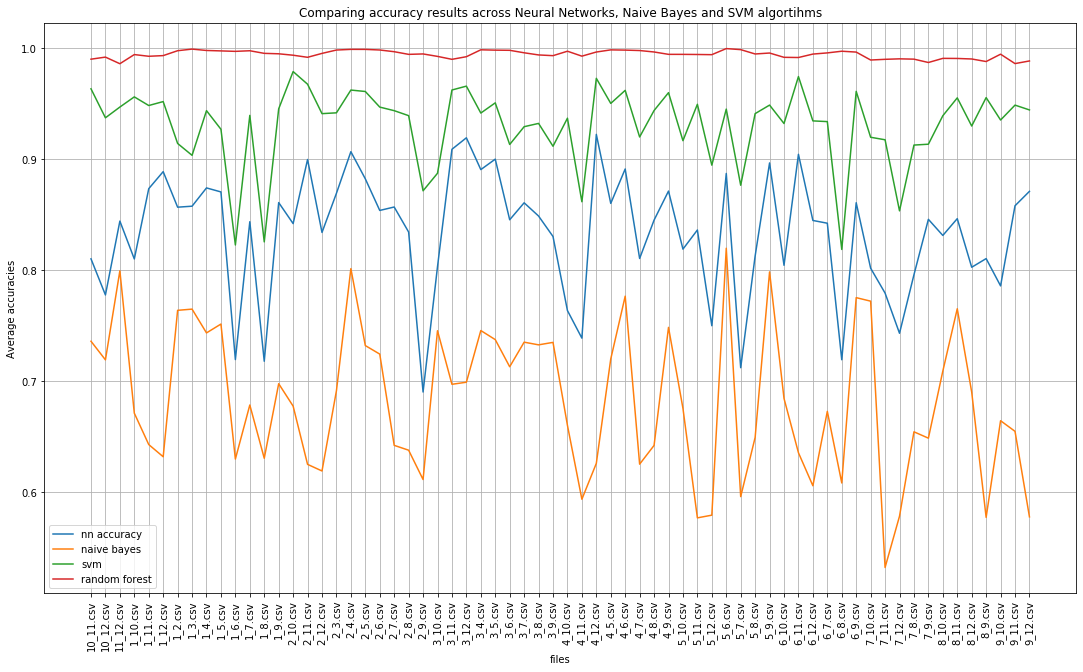

In [184]:


plt.plot(filename, nn_accuracy, label = "nn accuracy")
plt.plot(filename, nb_accuracy, label = "naive bayes")
plt.plot(filename, svm_accuracy, label = "svm")
plt.plot(filename, rf_accuracy , label = "random forest")
plt.xlabel("files")
plt.xticks(rotation='vertical')
plt.ylabel("Average accuracies")
plt.title("Comparing accuracy results across Neural Networks, Naive Bayes and SVM algortihms")

plt.grid()
plt.legend()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
plt.savefig('comparison_average_accuracies_line.png')


In [344]:
overallavg_nn = mean(nn_accuracy)
overallavg_nb = mean(nb_accuracy)
overallavg_svm = mean(svm_accuracy)
overallavg_rf = mean(rf_accuracy)

print('Neural Network Average:' ,round(overallavg_nn,2))
print('Naive bayes Average:' ,round(overallavg_nb,2))
print('svm Average:' ,round(overallavg_svm,2))
print('random forest Average:' ,round(overallavg_rf,2))

Neural Network Average: 0.83
Naive bayes Average: 0.68
svm Average: 0.93
random forest Average: 0.99


In [346]:
value_nn = max(nn_accuracy) #highest score in neural network scores
index = nn_accuracy.index(value_nn) #the index of that score

print(round(value_nn,2), index)
print(filename[35]) #the name of the corresponding dataset

0.92 35
4_12.csv


In [347]:
value = max(svm_accuracy)#highest score in SVM scores
index = svm_accuracy.index(value)#the index of that score

print(round(value,2),index)
print(filename[14])#the name of the corresponding dataset

0.98 14
2_10.csv


In [348]:
value_rf = max(rf_accuracy)#highest score in Random Forest scores
index = rf_accuracy.index(value_rf)#the index of that score

print(round(value_rf,2),index)
print(filename[44])#the name of the corresponding dataset

1.0 44
5_6.csv


In [352]:
file_4_12 = [['4_12'] ,nn_accuracy[35],svm_accuracy[35],rf_accuracy[35]] #best stimuli


In [160]:
file_2_10 = [['2_10'],nn_accuracy[14],svm_accuracy[14],rf_accuracy[14]]

In [161]:
file_5_6 = [['5_6'], nn_accuracy[44],svm_accuracy[44],rf_accuracy[44]]

In [350]:
from tabulate import tabulate

m = np.array([file_4_12,file_2_10,file_5_6])
headers = ["Datasets", "Neural Network", "SVM", "Random forest"]

# tabulate data
table = tabulate(m, headers, tablefmt="grid")

# output
print(table)

+------------+------------------+----------+-----------------+
| Datasets   |   Neural Network |      SVM |   Random forest |
+============+==================+==========+=================+
| ['4_12']   |         0.922396 | 0.97287  |        0.99656  |
+------------+------------------+----------+-----------------+
| ['2_10']   |         0.842037 | 0.978951 |        0.993681 |
+------------+------------------+----------+-----------------+
| ['5_6']    |         0.887188 | 0.945149 |        0.999652 |
+------------+------------------+----------+-----------------+


In [101]:
nn_results = data["22"]["Neural_Network"]["accuracy_results"]
svm_results=data["22"]["svm"]["accuracy_results"]

In [104]:
nn_matrix = data["22"]["Neural_Network"]["confusion_matrix"]

[[1220, 129], [99, 1168]]

In [108]:
svm_matrix = data["22"]["svm"]["confusion_matrix"]
svm_matrix

[[1349, 0], [71, 1196]]

In [93]:
nn_accuracy ,f = zip(*sorted(zip( nn_accuracy, filename)))
import numpy as np
np.c_[nn_accuracy,f]

array([['0.6903671801090241', '1_8.csv'],
       ['0.712259179353714', '7_11.csv'],
       ['0.7180658459663392', '3_12.csv'],
       ['0.7194294452667236', '5_11.csv'],
       ['0.7195656597614288', '9_12.csv'],
       ['0.7388897359371185', '4_10.csv'],
       ['0.7432722985744477', '3_10.csv'],
       ['0.7500594258308411', '6_11.csv'],
       ['0.7637115836143493', '7_12.csv'],
       ['0.7777678608894348', '8_9.csv'],
       ['0.7794578909873963', '2_3.csv'],
       ['0.7859440624713898', '3_11.csv'],
       ['0.7959571480751038', '10_11.csv'],
       ['0.8018706917762757', '3_6.csv'],
       ['0.8027280032634735', '1_11.csv'],
       ['0.8032073080539703', '1_10.csv'],
       ['0.8044966697692871', '2_8.csv'],
       ['0.8101877927780151', '5_12.csv'],
       ['0.8102838933467865', '11_12.csv'],
       ['0.810510390996933', '1_3.csv'],
       ['0.8106260240077973', '3_5.csv'],
       ['0.8128086924552917', '8_10.csv'],
       ['0.8190440356731414', '5_10.csv'],
       ['0.8304183

In [92]:
svm_accuracy ,f = zip(*sorted(zip( svm_accuracy, filename)))
np.c_[svm_accuracy,f]

array([['0.8187708922257831', '1_4.csv'],
       ['0.8227841858035922', '2_3.csv'],
       ['0.825581855814414', '10_11.csv'],
       ['0.8535240274599541', '3_4.csv'],
       ['0.8617130968190729', '2_6.csv'],
       ['0.8715732245620693', '2_9.csv'],
       ['0.8765751945750466', '6_7.csv'],
       ['0.8873800744533163', '9_11.csv'],
       ['0.8946752674154677', '6_9.csv'],
       ['0.9035210060073116', '6_11.csv'],
       ['0.911691706329482', '5_8.csv'],
       ['0.912765611536523', '6_12.csv'],
       ['0.9132916573137464', '4_7.csv'],
       ['0.9135359028881345', '4_5.csv'],
       ['0.9142117285635211', '3_10.csv'],
       ['0.9167077483656628', '2_12.csv'],
       ['0.9175312760633861', '4_6.csv'],
       ['0.9197919808370372', '7_8.csv'],
       ['0.9200508931313353', '9_10.csv'],
       ['0.9269936960585451', '8_9.csv'],
       ['0.9293054099814562', '7_9.csv'],
       ['0.9299242805075142', '5_7.csv'],
       ['0.9321705909344591', '3_7.csv'],
       ['0.9322659443078238',

In [87]:
np.c_[rf_accuracy,f]

array([['0.9860283159463487', '11_12.csv'],
       ['0.9861429742356224', '9_11.csv'],
       ['0.9871186427517099', '7_9.csv'],
       ['0.9879923873096829', '8_9.csv'],
       ['0.9885149290259422', '9_12.csv'],
       ['0.9893585867615906', '7_10.csv'],
       ['0.9899815225424982', '3_11.csv'],
       ['0.9899874895746456', '7_11.csv'],
       ['0.9901134963139724', '10_11.csv'],
       ['0.9901452489496994', '7_8.csv'],
       ['0.9902946911546147', '8_12.csv'],
       ['0.9904195270785661', '7_12.csv'],
       ['0.9907663228061274', '8_11.csv'],
       ['0.9908427782621331', '8_10.csv'],
       ['0.9916137439203133', '6_11.csv'],
       ['0.9917863711910739', '6_10.csv'],
       ['0.9918076382217397', '2_11.csv'],
       ['0.9919765140666646', '10_12.csv'],
       ['0.9923442394709363', '3_12.csv'],
       ['0.9926286349688743', '3_10.csv'],
       ['0.9927311868286163', '1_11.csv'],
       ['0.9928444570922658', '4_11.csv'],
       ['0.9932784138666945', '3_9.csv'],
       ['0.9

In [187]:
nn_matrix

[[[1295, 54], [204, 1371]],
 [[1207, 142], [371, 656]],
 [[1439, 136], [263, 764]],
 [[1184, 165], [224, 1082]],
 [[1211, 306], [162, 1965]],
 [[862, 140], [221, 777]],
 [[1343, 174], [193, 1382]],
 [[1476, 41], [330, 526]],
 [[1434, 83], [237, 930]],
 [[1421, 96], [303, 724]],
 [[1331, 186], [141, 1165]],
 [[1307, 210], [200, 1067]],
 [[1419, 98], [135, 1214]],
 [[1439, 136], [164, 1003]],
 [[1551, 24], [426, 430]],
 [[1394, 190], [231, 1286]],
 [[1105, 201], [152, 1423]],
 [[1354, 221], [262, 1005]],
 [[1198, 108], [597, 430]],
 [[1247, 337], [173, 1954]],
 [[1396, 188], [221, 806]],
 [[1220, 129], [99, 1168]],
 [[2024, 103], [257, 1049]],
 [[648, 354], [94, 1173]],
 [[1961, 166], [258, 1091]],
 [[1244, 340], [494, 1081]],
 [[1348, 236], [106, 1243]],
 [[1057, 292], [348, 819]],
 [[1945, 182], [349, 1226]],
 [[803, 199], [103, 1064]],
 [[875, 127], [226, 630]],
 [[897, 270], [114, 1153]],
 [[2093, 34], [466, 561]],
 [[1243, 106], [359, 497]],
 [[1452, 132], [238, 1068]],
 [[1463, 121

In [338]:
data_split=[]
full_data = []
h = df["slideNumber"].value_counts()
majority_classifier = []

In [339]:
import re

for each in filename:
 
    slide , slide2 = re.findall('\d+', each)
    
    data1 =h[int(slide)] 
    data2 =h[int(slide2)]
    total = data1 +data2
    
    if data1 > data2:
        majority_class = data1/ total
    else:
        majority_class = data2/ total
        
    majority_classifier.append(float('%.16f' %majority_class))
        
        
    
    data_split.append([data1,data2,total])
    
    
    


In [340]:
type(majority_classifier[1])

float

In [301]:
type(rf_accuracy)

tuple